

## <center>SVM Hands-On on Drug-Analysis




















drug.avif

# - **Objective**:

The objective of this project is to accurately predict the suitable drug outcomes for patients. To achieve this, we will perform various steps including dataset analysis, outlier detection, data distribution exploration, data preprocessing, model building using Support Vector Classifier (SVC), hyperparameter tuning, and implementing a user-friendly prediction function. The primary goal is to obtain a high accuracy score for the drug classification task.

# Data Decription

Age - Age of the Patient

Sex - Gender of the patients

BP - Blood Pressure Levels

Cholesterol - Cholesterol Levels

Na_to_K - Sodium to potassium Ration in Blood

Drug - Drug Type

In [57]:
import sklearn
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import necessary libraries and modules

# sklearn: Scikit-learn library for machine learning algorithms and utilities
# SVC: Support Vector Classifier from sklearn.svm for classification tasks
# numpy: Numerical computing library for efficient array operations
# pandas: Data manipulation and analysis library for structured data
# matplotlib.pyplot: Plotting library for data visualization
# seaborn: Statistical data visualization library based on matplotlib
# train_test_split: Function from sklearn.model_selection for splitting data into training and testing sets
# accuracy_score, precision_score, recall_score, f1_score: Evaluation metrics from sklearn.metrics for model performance assessment

In [58]:
from google.colab import drive
drive.mount('/content/drive')

# mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Drug_svm_project_by_Ayush/drug (1).csv')

In [60]:
df.head()
#This code snippet displays the first few rows of the DataFrame df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [61]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


The head() and tail() function for dataframe shows the top 5 rows and last 5 row. This helps us to understand what kind of data is stored in our dataframe.

- here we can see that data is in the numeric format for age column and Na_to_K column.
- we can see that gender, BP, Cholestrol and Drug are all object type column.

Now we shall cross-varify it with the help of info() where it gives us 6 insights in total where datattypes is one of them.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In the above df.info() we can get mainly 6 insights

- we can see that we have 200 rows in total which is very little compared to other datasets we would use.
- the index in my data ranges from 0 to 199
- we can see the number of columns that is 6
- we can see the list of all the columns present in our dataset
- we can see all the datatypes a column is associated with
- we can also see if all columns are full or we have any null values.
- In this case we can see that there are no null values

Here we can see that as discussed above:
- age and Na_to_K are both numeric columns
- gender, BP, Cholestrol and Drug are all object type colum

In [63]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Here we do not have any null values as a resut of which we do not have to worry about them.
- If there were any null values we could handle them with the help of central tendancy (mean,median,mode) where mean and median is for numeric data nad mode is for object type data.

In [64]:
# Check for missing values in the DataFrame
missing_values = df.isin(['?', '/', '']).any().any()
missing_values
# The variable `missing_values` will be True if there are any missing values in the DataFrame, and False otherwise.


np.False_

isin() is a function which checks if a certain given pattern is present in the dataset or not.
- Sometimes in the data we tend to have special symbold included instead of values.
  - when this happens we need to convert them to null values or any required value and handle them accordingly.

- Here we are getting the answer as false which indicates that there are no such values.

Here False indicates we do not have any miscellaneous
 values

In [65]:
# Replace empty strings, question marks, and slashes with NaN
df.replace([' ', '?', '/'], np.nan, inplace=True)

# Check the count of missing values in each column
#missing_counts = df.isnull().sum()

# The variable `missing_counts` contains the count of missing values in each column of the DataFrame.

# Get column names and data types
columns = df.columns.tolist()
data_types = df.dtypes.tolist()

# Get the number of null values in each column
null_counts = df.isnull().sum().tolist()

# Create a dictionary with the data
data = {
    'Column': columns,
    'Data Type': data_types,
    'Null Count': null_counts
}

# Create a DataFrame from the dictionary
table = pd.DataFrame(data)

table

,Column,Data Type,Null Count
0,Age,int64,0
1,Sex,object,0
2,BP,object,0
3,Cholesterol,object,0
4,Na_to_K,float64,0
5,Drug,object,0


We are examining the data for the presence of any special symbols and replacing them with null values if found. As observed, there are no such values in the data. Then we are trying to display the null value count, datatypes of the columns and the column names all together in the form of a table to make it easy to understand.

Showing to verify if there are any values present in the dataset - hence the above step is optional


----

### Outlier analysis

Outliers are data points that significantly differ from the majority of the data, lying far away from the typical range and can potentially skew statistical analysis and machine learning models.

Sometimes handling outliers is a good idea but not always.
- here if we see our data is too small to handle outliers.
- when outliers are handled we usually lose some data which in our case would be a disadvantage.

The percentage of outliers in the  Age  column is:  0.0  

The percentage of outliers in the  Na_to_K  column is:  4.0  



,Columns,Data Type,Has Outliers,Column
0,NaN,int64,False,Age
1,NaN,float64,True,Na_to_K


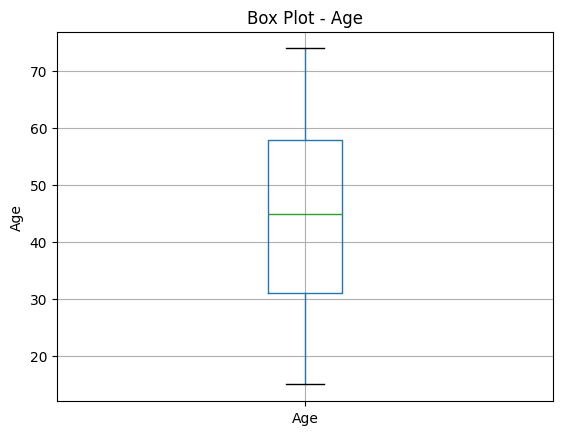

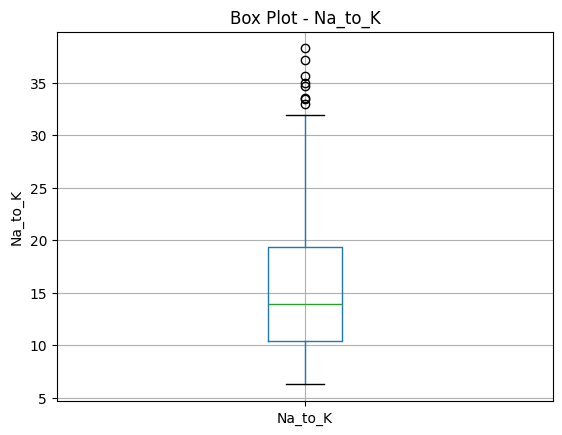

In [66]:
# Create a table to store outlier information
outlier_table = pd.DataFrame(columns=['Columns', 'Data Type', 'Has Outliers'])

# Iterate through each column
for column in df.columns:
    data_type = df[column].dtype  # Get the data type of the column

    if data_type in ['int64', 'float64']:  # Check numerical columns
        # Calculate the 1.5 IQR (Interquartile Range)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        outlier_range = 1.5 * iqr

        # Check for outliers
        lower_bound = q1 - outlier_range
        upper_bound = q3 + outlier_range
        has_outliers = any((df[column] < lower_bound) | (df[column] > upper_bound))

        # Count the number of outliers
        num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

        # Calculate the percentage of outliers
        percentage_outliers = (num_outliers / df.shape[0]) * 100
        print(f'The percentage of outliers in the ',column,' column is: ',percentage_outliers,' \n')


        # Add information to the outlier table
        outlier_table = pd.concat(
            [outlier_table, pd.DataFrame({
                'Column': [column],
                'Data Type': [data_type],
                'Has Outliers': [has_outliers]
            })], ignore_index=True
        )

        # Plot box plot to visualize outliers
        plt.figure()
        df.boxplot(column=column)
        plt.title(f'Box Plot - {column}')
        plt.ylabel(column)

# Cast the data type of the "Has Outliers" column to bool
outlier_table['Has Outliers'] = outlier_table['Has Outliers'].astype(bool)

# Print the outlier table
outlier_table


This is what we can analyse brom the above output:

- first of all the percentage of outliers
  - we can see here that age column has 0% of outliers
  - na-to-k has 4% of outliers which we would generally handle if our data was large.

- second a table that confirms with a True and False if the column has null value

- thirs of all it shows the outliers with the help of box plots.

Here we shall not handle our outliers but if we wish to then we can do so with the IQR method where,

- get values of Q3 ans Q1 to calculate IQR value
  - IQR = Q3-Q1

- get the values of upper limit and lower limit to determing what would be the limit values to consider for outliers.
  - upper limit = Q3+1.5*IQR
  - lower limit = Q1-1.5*IQR

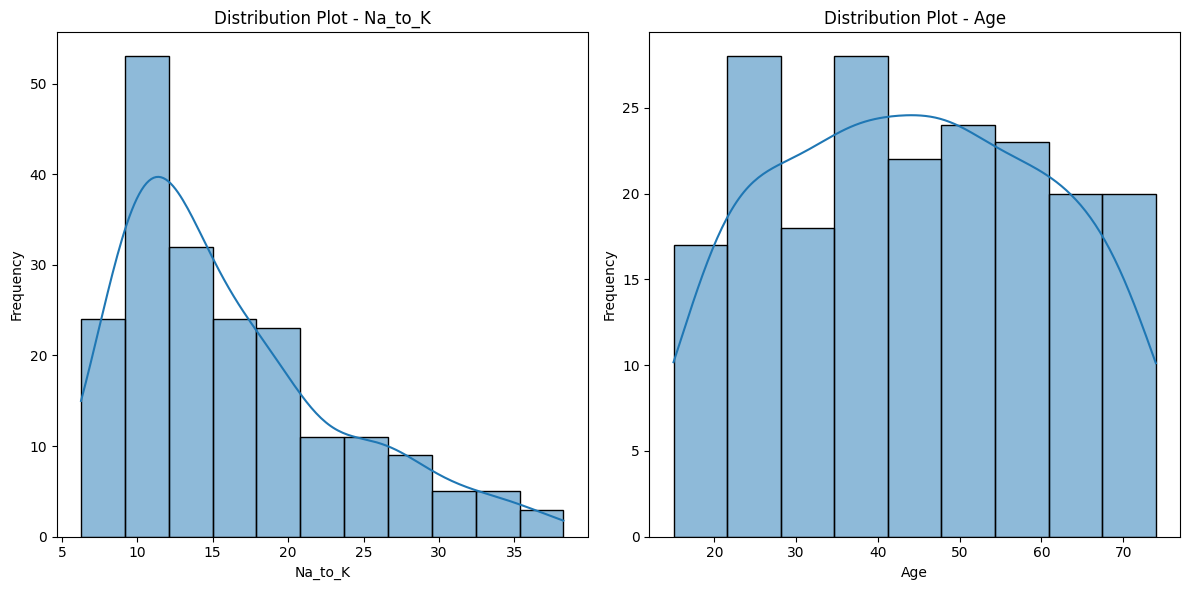

In [67]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of 'Na_to_K' column
sns.histplot(df['Na_to_K'], kde=True, ax=axes[0])
axes[0].set_title('Distribution Plot - Na_to_K')
axes[0].set_xlabel('Na_to_K')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'Age' column
sns.histplot(df['Age'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot - Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


insights for age:
- here we can see the data is not normally distributed
- Here we can see that our dataset contains more people with age between 20-30 and 35-40.

insights for Na_to_K:
- the data is right skewed
- we can collect here that na_to_k level mostly falls at the range of approximatly 7 to 15.


## Data Engineering


- Data engineering ensures data quality and reliability for accurate analysis and decision-making.
- It enables efficient storage, processing, and integration of large volumes of data.
- Data engineering facilitates data transformation and preparation for analysis and reporting.
- It ensures data security and compliance with regulations and privacy policies.
- Data engineering forms the foundation for successful data-driven initiatives and maximizes the value of data assets.

In [68]:
dataframe_int = df.copy()
#Creating a copy of the original dataframe for further processing and transformations.

In [69]:
from sklearn.preprocessing import LabelEncoder


Label encoding is a technique that assigns a unique numerical label to each category in a categorical variable, enabling machine learning algorithms to process and analyze the data.

In [70]:
encoder = LabelEncoder()
# creating an object for LabelEncoder()

Here we can see that 'Sex','BP','Cholesterol'and 'Drug' are object type columns. We also know that by converting them into numberic type we will be able to perform more operations on them. Hence below we are extracting all the object type columns in specific and converting them into numeric by LabelEncoding.

We generally have 3 encoding techniques :

- Label Encoding
- One Hot Encoding
- Dummy Encoding


but here we are using Label Encoding

In [71]:
categorical_data = ['Sex','BP','Cholesterol','Drug']
# collecting all categorical columns to perform label encoding

In [72]:
for col in categorical_data:
    dataframe_int[col] = encoder.fit_transform(df[col])
#Encoding the categorical columns in the dataframe using the LabelEncoder from scikit-learn.

In [73]:
dataframe_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [74]:
for col in categorical_data:
    print(col,dataframe_int[col].unique())
#Printing the unique values of each categorical column in the dataframe.

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [75]:
for col in categorical_data:
    print(col,df[col].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


here we can see that the object type data is encoded into a numeric type afetr label encoding.

- We have displayed and compared the same where in gender column 0=Female, 1=Male.
- in BP column High=0, Low=1, Normal=2
- in Cholestrol High=0, Normal=1
- in Drug, drugy=0,drugc=1, drugx=2, druga=3,drugb=4

In [76]:
dataframe_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


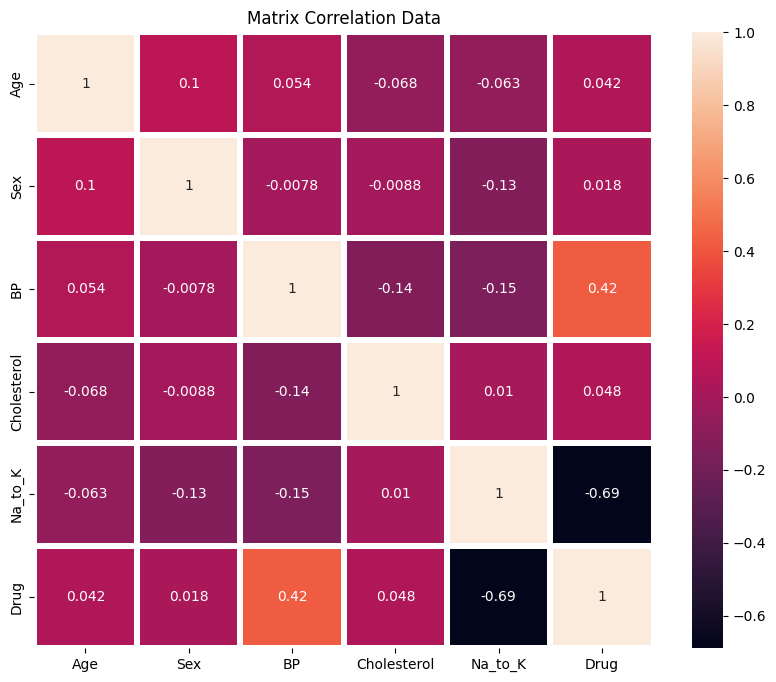

<Figure size 640x480 with 0 Axes>

In [77]:
plt.figure(figsize=(10,8))
plt.title('Matrix Correlation Data')
sns.heatmap(dataframe_int.corr(),annot=True,linewidths=3)
plt.show()
plt.savefig('Matrix Correlation Data')
#Plotting the correlation matrix of the dataframe to visualize the relationships between variables.

from the above matrix we can see that the
- target column Drug has very bad co-relation with Na_to_K column with -0.69(negetive)
- and the best co-relation with BP column with 0.42 as the corelation(positive)



In [78]:
def distribution():
    fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
    plt.suptitle('Distribution',fontsize=24)

    def col_generator():
       # Generator function to iterate through dataframe columns
        for col in dataframe_int:
            yield col
    col = col_generator()

    for i in range(0,2):
        for j in range(0,3):
            k = next(col)
            dataframe_int[k].plot(kind='hist',ax=axes[i,j])
            axes[i,j].set_title(k)
            #Save and display the plot
    plt.savefig('Distribution Data.png')
    plt.show()

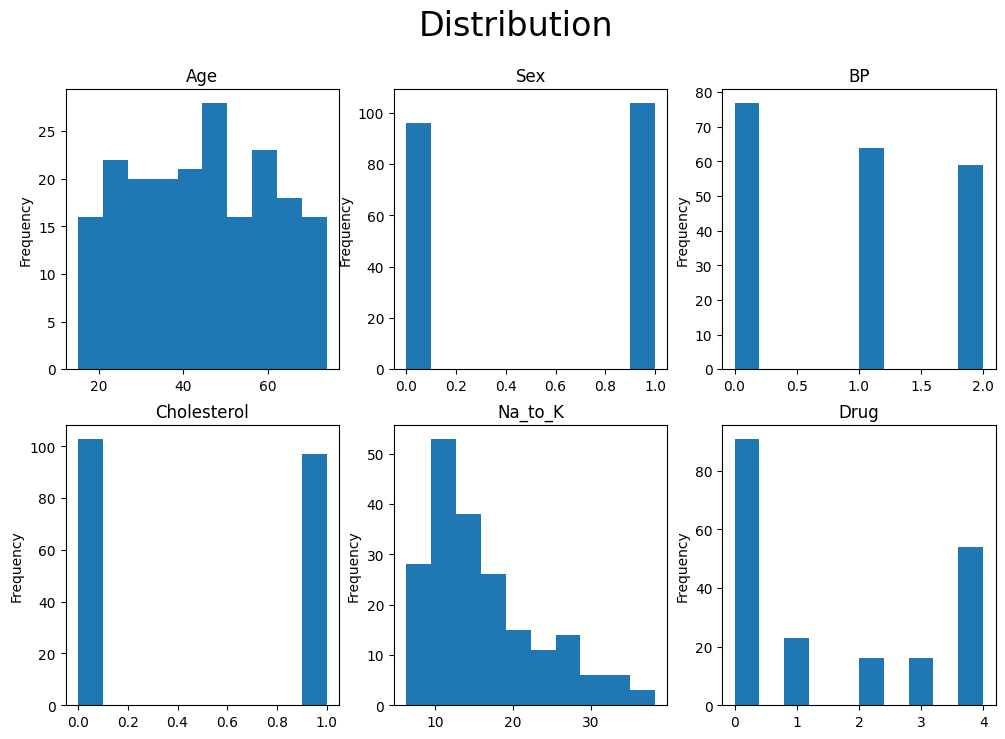

In [79]:
distribution()

the above subplots show the distribution of all the columns in the data.

- insights for age:

here we can see the data is not normally distributed.
Here we can see that our dataset contains more people with age between 20-30 and 35-40.

- insights for Na_to_K:

the data is right skewed.
we can collect here that na_to_k level mostly falls at the range of approximatly 7 to 15.

- insights for cholestrol:

we can see that more number of people do not have high cholestrol.

- insights for Drug:

we can see that Drug 0  is used more in quantity rather than others. The second highest used drug would be drug 4

In [80]:
data = dataframe_int.drop('Drug',axis=1)
label = dataframe_int['Drug']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

In [83]:
from sklearn.svm import SVC

In [84]:
model = SVC(gamma='scale')
#Create an instance of the SVC model with default parameters

- The choice between 'auto' and 'scale' for the gamma parameter in SVM depends on the characteristics of your dataset and the specific problem you are trying to solve.

- In general, 'scale' is often considered a safer and more reliable option. It automatically scales the gamma value based on the standard deviation of the input data, which helps in adapting to different datasets. This scaling can prevent issues related to uneven feature scales and can provide a balanced influence of individual training samples on the decision boundary.

- On the other hand, 'auto' calculates gamma based on the inverse of the variance of the input data. This strategy can work well when the features have similar scales, but it may not handle datasets with highly varying scales as effectively as 'scale'.

- Ultimately, it is recommended to try both 'auto' and 'scale' on your specific dataset and evaluate their impact on the performance of your SVM model. This empirical comparison will help you determine which option yields better results for your particular problem.






In [85]:
model.fit(x_train,y_train)

SVC()

In [86]:
x_train

,Age,Sex,BP,Cholesterol,Na_to_K
166,58,0,1,0,26.645
97,56,0,0,0,25.395
159,34,0,1,1,12.923
34,53,1,2,0,14.133
153,72,0,1,1,14.642
...,...,...,...,...,...
57,40,1,0,0,27.826
33,65,0,0,1,31.876
111,47,0,2,1,6.683
9,43,1,1,1,19.368


In [87]:
prediction = model.predict(x_test)
prediction.reshape(-1, 1)

array([[0],
       [0],
       [4],
       [0],
       [0],
       [4],
       [4],
       [0],
       [4],
       [4],
       [4],
       [0],
       [0],
       [4],
       [4],
       [0],
       [0],
       [4],
       [4],
       [4],
       [4],
       [4],
       [0],
       [0],
       [0],
       [4],
       [4],
       [0],
       [4],
       [4],
       [0],
       [0],
       [0],
       [4],
       [4],
       [0],
       [4],
       [0],
       [0],
       [0]])

In [88]:
y_test=np.array((y_test),ndmin=2)
y_test=y_test.reshape(-1, 1)

In [89]:
accuracy = accuracy_score(y_test, prediction)

In [90]:
accuracy

0.75

Here we can see thet the accuracy is not up to the mark so lets try to make it better with hyperparameter tuning.

### Hyperparameter Tuning

GridSearchCV is a method in scikit-learn, a popular machine learning library in Python, that performs an exhaustive search over a predefined hyperparameter grid to find the best combination of hyperparameters for a machine learning model.

The term "CV" in GridSearchCV refers to cross-validation. It means that the method performs cross-validation internally to evaluate the performance of different hyperparameter combinations.

Upon observing suboptimal accuracy results, I am conducting hyperparameter tuning to enhance the model's performance. GridSearchCV, an iterative process, is employed to explore different hyperparameter combinations and identify the optimal values for the given model. As previously mentioned, the selection of appropriate hyperparameter values greatly influences the overall performance and effectiveness of the model.

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
SVC(gamma='scale').get_params()
#Get the parameters of the SVC model with 'scale' gamma parameter for feature scaling

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Here's how GridSearchCV works:**

### Defining the parameter grid:
You specify a dictionary or a list of dictionaries that contains the hyperparameters and their corresponding values to explore. Each dictionary represents a set of hyperparameters.

In [93]:
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':[100,10,1,0,1,0.01]}

- For the 'C' parameter, the values specified are [0.01, 0.1, 1, 10, 100]. 'C' controls the balance between simplicity and accuracy of the model,
- For the 'gamma' parameter, the values specified are [100, 10, 1, 0, 1, 0.01]. 'gamma' controls the flexibility and complexity of the decision boundary.

The purpose of using a grid of values is to perform a grid search, which involves training and evaluating the model using all possible combinations of the specified hyperparameter values. This helps in finding the optimal set of hyperparameters that results in the best performance for the model.

---

## Creating the estimator:
You create an estimator object (a machine learning model) that you want to tune using GridSearchCV. This could be any scikit-learn estimator, such as a decision tree, random forest, or support vector machine.

### Instantiate GridSearchCV:
You create an instance of GridSearchCV, passing the estimator, parameter grid, and other optional parameters such as the scoring metric and cross-validation strategy.

In [94]:
best_model = GridSearchCV(SVC(),param_grid,cv=5,refit=True)
#Perform grid search with cross-validation to find the best model using SVC and specified parameter grid

- param_grid: This parameter specifies the dictionary or list of dictionaries containing the hyperparameters and their corresponding values to explore during the grid search. In this code, the param_grid dictionary defined earlier is passed as the parameter.
- cv: This parameter specifies the cross-validation strategy to be used during the grid search. In this code, cv=5 indicates that 5-fold cross-validation will be performed. This means that the dataset will be divided into five subsets (folds), and the model will be trained and evaluated five times, each time using a different fold as the validation set.
-refit=True enables the automatic refitting of the best model found during the grid search on the entire dataset, allowing you to obtain a finalized model that can be used for prediction without any additional steps.

------

### Fitting the data:
You fit the GridSearchCV object to your training data. GridSearchCV will perform an exhaustive search over all possible hyperparameter combinations by training and evaluating the model for each combination using cross-validation.

In [95]:
best_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]})


### Accessing the best model:
You can access the best model obtained with the optimal hyperparameters using the best_estimator_ attribute of GridSearchCV

In [96]:
best_model.best_estimator_

SVC(C=100, gamma=0.01)

In [97]:
prediction = best_model.predict(x_test)
prediction = prediction.reshape(-1, 1)


In [98]:
y_test=np.array((y_test),ndmin=0)
y_test=y_test.reshape(-1, 1)


In [100]:
accuracy = accuracy_score(y_test, prediction) * 100
accuracy

92.5

We can see that after performing the hyperparameter tuning we are getting better accuracy of about 92.5%.

###  Model Evaluation (Post Hyperparameter Tuning)

After performing hyperparameter tuning on the SVM model, we evaluated its performance using a confusion matrix and a classification report.

####  Confusion Matrix
The confusion matrix shows how well the model is able to distinguish between the different drug categories.


In [101]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))


[[17  0  1  0  0]
 [ 0  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  1  1]
 [ 1  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00         4
           2       0.75      1.00      0.86         3
           3       1.00      0.50      0.67         2
           4       0.92      0.92      0.92        13

    accuracy                           0.93        40
   macro avg       0.92      0.87      0.88        40
weighted avg       0.93      0.93      0.92        40



# Classification Report Highlights
Metric	Value (Weighted Avg)
Accuracy	0.93
Precision	0.93
Recall	0.93
F1-Score	0.92

Very solid performance, especially for a small dataset.

F1-score shows balance between precision and recall — this is important in medical predictions.



# Conclusion
In this project, we aimed to predict suitable drug types for patients based on their medical characteristics. The dataset included 200 records with six features: Age, Sex, BP, Cholesterol, Na_to_K ratio, and Drug (target).

#We carried out the following steps:

Performed exploratory data analysis, including outlier detection and distribution checks.

Identified that Age was non-normally distributed, and Na_to_K was right-skewed.

Applied label encoding to convert categorical variables into numerical format.

Found key correlations:

A strong negative correlation between Na_to_K and Drug (-0.69)

A moderate positive correlation between BP and Drug (0.42)

#Using this processed data,

 we trained a Support Vector Classifier (SVC). After hyperparameter tuning, the model achieved a 93% accuracy, along with balanced precision, recall, and F1-scores.



#Overall, this project demonstrates the potential of machine learning—specifically SVMs—for accurate drug recommendation based on patient profiles. It highlights how structured clinical data can be leveraged to support medical decision-making.